In [36]:
%matplotlib notebook
import pandas as pd
import os
from datetime import datetime

In [37]:
export_path = "../export"
df_files = ["border_info.parquet","infecteds_history.parquet","infected_tiles.parquet"]

dates = os.listdir(export_path)
dates

['2020-07-27 01:26',
 '2020-07-27 01:28',
 '2020-07-27 01:24',
 '2020-07-27 01:25']

In [38]:
simulations = {}
for d in dates:
    simulation_date = datetime.strptime(d, '%Y-%m-%d %H:%M')
    simulations[d] = {"date":simulation_date}
    for dff in df_files:
        parquet_dir = f"{export_path}/{d}/{dff}"
        parquet_files = [f for f in os.listdir(parquet_dir) if f.endswith(".parquet")]
        # We need spark repartition to just one file on save stats data
        simulations[d][dff] = pd.read_parquet(f"{parquet_dir}/{parquet_files[0]}")  

In [39]:
sims_dates = list(simulations.keys())
sims_dates

['2020-07-27 01:26',
 '2020-07-27 01:28',
 '2020-07-27 01:24',
 '2020-07-27 01:25']

In [40]:
simulations[sims_dates[3]][df_files[0]]

,min_latitude,max_latitude,min_longitude,max_longitude,min_tile_x,max_tile_x,min_tile_y,max_tile_y,total
0,9.999086,10.000914,9.999099,10.000901,0,203,0,200,100004


In [4]:
df

,tile_x,tile_y,infecteds,totals
0,36,83,1,4
1,58,32,1,3
2,138,172,1,3
3,75,175,1,3
4,134,95,1,1
...,...,...,...,...
30791,110,109,0,1
30792,194,63,0,2
30793,42,153,0,1
30794,186,61,0,1


In [5]:
df2 = df.copy()
df2.tile_x = df2.tile_x.div(10).round(0).astype(int)
df2.tile_y = df2.tile_y.div(10).round(0).astype(int)
tiles = df2.groupby(["tile_x","tile_y"]).sum().infecteds.to_frame().reset_index()
tiles.tile_x.values

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

<IPython.core.display.Javascript object>


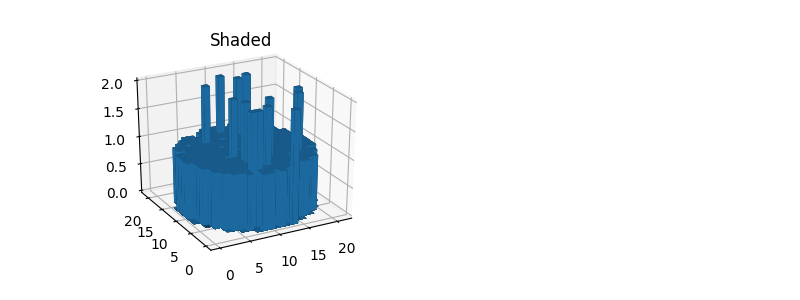

Text(0.5, 0.92, 'Shaded')

In [6]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

x,y = df2.tile_x, df2.tile_y
top = df2.infecteds
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

In [ ]:
tiles.reset_index()

In [ ]:
list(df2.tile_x.values)